In [47]:
# Placa triangular
import numpy as np
import matplotlib.pyplot as plt

# Información de la pieza
Lx = 10
Ly = Lx
dx = 1; dy = dx
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)

# variables de solución
T = np.zeros([y.size,x.size])+1e-5
Tviejo = np.zeros([y.size,x.size])
dTdx = np.zeros([y.size,x.size])
dTdy = np.zeros([y.size,x.size])

# condiciones de frontera
# Extremo izquierdo
T[:,0] =  25;
# Extremo superior
T[-1,:] = 100

# Diagonal principal
for i in np.arange(1,x.size-1):
    T[i,i] = 50
T

array([[2.5e+01, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05,
        1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05],
       [2.5e+01, 5.0e+01, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05,
        1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05],
       [2.5e+01, 1.0e-05, 5.0e+01, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05,
        1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05],
       [2.5e+01, 1.0e-05, 1.0e-05, 5.0e+01, 1.0e-05, 1.0e-05, 1.0e-05,
        1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05],
       [2.5e+01, 1.0e-05, 1.0e-05, 1.0e-05, 5.0e+01, 1.0e-05, 1.0e-05,
        1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05],
       [2.5e+01, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 5.0e+01, 1.0e-05,
        1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05],
       [2.5e+01, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 5.0e+01,
        1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05],
       [2.5e+01, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05,
        5.0e+01, 1.0e-05, 1.0e-05, 1.0e-05],
       [2.5e+01, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05, 1.0e-05,
 

Text(0.5, 1.0, 'Gráfico de distribución de Temperatura en placa triangular')

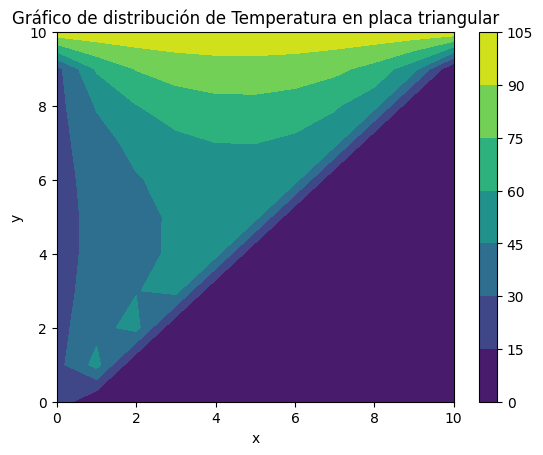

In [48]:
#Cálculo de los datos interiores de la placa
Error = 1
while(Error>0.01):
    Tviejo[:,:] = T[:,:]
    for j in np.arange(2,y.size-1):
        for i in np.arange(1,j):
            T[j,i]=(T[j,i+1]+T[j,i-1]+T[j+1,i]+T[j-1,i])/4


    E=np.abs((T-Tviejo)/T)
    Error = E.max()

# Gráfico
X,Y = np.meshgrid(x,y)
plt.contourf(X,Y,T)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de distribución de Temperatura en placa triangular")


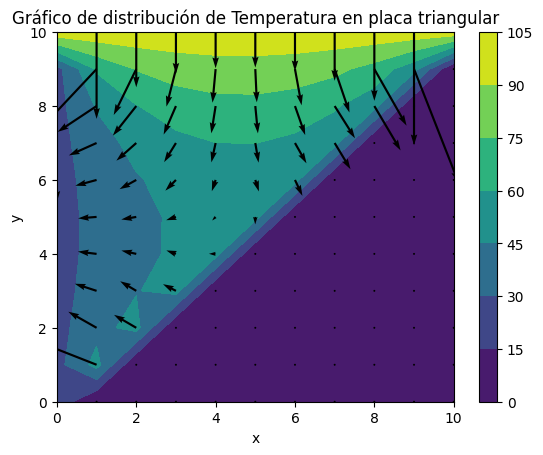

In [49]:
# Conducción de Flujo
# derivadas en x
for j in np.arange(0,y.size):
    
    for i in np.arange(0,j+1):
        if (i == 0):
            if j == 0:
                dTdy[j,i] = (T[j+1,i]-T[j,i])/dy
            elif j == y.size-1:
                dTdy[j,i] = (T[j,i]-T[j-1,i])/dy
                dTdx[j,i] = (T[j,i+1]-T[j,i])/dx
            else:
                dTdy[j,i] = (T[j+1,i]-T[j-1,i])/2/dy
                dTdx[j,i] = (T[j,i+1]-T[j,i])/dx
        elif (j == y.size-1):
            if (i == x.size-1):
                dTdx[j,i] = (T[j,i]-T[j,i-1])/dx
            else:
                dTdy[j,i] = (T[j,i]-T[j-1,i])/dy
                dTdx[j,i] = (T[j,i+1]-T[j,i-1])/2/dx
        elif (i==j):
            dTdx[j,i] = (T[j,i]-T[j,i-1])/dx
            dTdy[j,i] = (T[j+1,i]-T[j,i])/dy
        else:
            dTdx[j,i] = (T[j,i+1]-T[j,i-1])/2/dx
            dTdy[j,i] = (T[j+1,i]-T[j-1,i])/2/dy



#Coeficiente de conducción de calor
kp = 0.5
#flujo en x
qx = -kp*dTdx
#flujo en y
qy = -kp*dTdy
plt.contourf(X,Y,T)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de distribución de Temperatura en placa triangular")
plt.quiver(x,y,qx,qy)